In [2]:
import uproot
import awkward

Load the datasets

In [3]:
# double gamma (two photons)
file_name = "data/ntuples_13723006_0.root"

tracksters_ds    = {file_name: "ticlNtuplizer/tracksters"}
simtracksters_ds = {file_name: "ticlNtuplizer/simtrackstersSC"}
associations_ds  = {file_name: "ticlNtuplizer/associations"}

In [4]:
tracksters = uproot.open(tracksters_ds)
simtracksters = uproot.open(simtracksters_ds)
associations = uproot.open(associations_ds)

Print the available attributes

In [5]:
tracksters.show(name_width=40)

name                                     | typename                 | interpretation                
-----------------------------------------+--------------------------+-------------------------------
event                                    | uint32_t                 | AsDtype('>u4')
NClusters                                | uint32_t                 | AsDtype('>u4')
NTracksters                              | uint32_t                 | AsDtype('>u4')
time                                     | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
timeError                                | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
regressed_energy                         | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
raw_energy                               | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
raw_em_energy                            | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
raw_pt                                

In [6]:
simtracksters.show(name_width=40)

name                                     | typename                 | interpretation                
-----------------------------------------+--------------------------+-------------------------------
stsSC_event                              | uint32_t                 | AsDtype('>u4')
stsSC_NClusters                          | uint32_t                 | AsDtype('>u4')
stsSC_NTracksters                        | uint32_t                 | AsDtype('>u4')
stsSC_time                               | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
stsSC_timeError                          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
stsSC_regressed_energy                   | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
stsSC_raw_energy                         | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
stsSC_raw_em_energy                      | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
stsSC_raw_pt                          

In [7]:
associations.show(name_width=40)

name                                     | typename                 | interpretation                
-----------------------------------------+--------------------------+-------------------------------
tsCLUE3D_recoToSim_SC                    | std::vector<std::vect... | AsObjects(AsVector(True, As...
tsCLUE3D_recoToSim_SC_score              | std::vector<std::vect... | AsObjects(AsVector(True, As...
tsCLUE3D_simToReco_SC                    | std::vector<std::vect... | AsObjects(AsVector(True, As...
tsCLUE3D_simToReco_SC_score              | std::vector<std::vect... | AsObjects(AsVector(True, As...
tsCLUE3D_recoToSim_SC_sharedE            | std::vector<std::vect... | AsObjects(AsVector(True, As...
tsCLUE3D_recoToSim_CP                    | std::vector<std::vect... | AsObjects(AsVector(True, As...
tsCLUE3D_recoToSim_CP_score              | std::vector<std::vect... | AsObjects(AsVector(True, As...
tsCLUE3D_simToReco_CP                    | std::vector<std::vect... | AsObjects(AsVector(Tr

In [8]:
# print some stats
print("Events:", tracksters["event"].array())
print("Rec Tracksters:", tracksters["NTracksters"].array())
print("Sim Tracksters:", simtracksters["stsSC_NTracksters"].array())

Events: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ... 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
Rec Tracksters: [3, 2, 1, 3, 2, 4, 2, 2, 2, 3, 3, 4, 2, 3, ... 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2]
Sim Tracksters: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ... 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


Plot the tracksters
- there is 100 events in the dataset

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [10]:
def get_bounding_box(eid):
    # get the trackster barycenters for event eid
    bx = tracksters["barycenter_x"].array()[eid]
    by = tracksters["barycenter_y"].array()[eid]
    bz = tracksters["barycenter_z"].array()[eid]
    sbx = simtracksters["stsSC_barycenter_x"].array()[eid]
    sby = simtracksters["stsSC_barycenter_y"].array()[eid]
    sbz = simtracksters["stsSC_barycenter_z"].array()[eid]

    # get approximate plottable area
    x_max = max([max(bx), max(sbx)]) + 10
    x_min = min([min(bx), min(sbx)]) - 10
    y_max = max([max(by), max(sby)]) + 10
    y_min = min([min(by), min(sby)]) - 10
    z_max = max([max(bz), max(sbz)]) + 10
    z_min = min([min(bz), min(sbz)]) - 10

    return x_max, x_min, y_max, y_min, z_max, z_min

def plot_event(eid):
    """
    Plot Reco and Sim tracksters in the event
    """
    x_max, x_min, y_max, y_min, z_max, z_min = get_bounding_box(eid)

    # get the layerclusters for event eid
    vx = tracksters["vertices_x"].array()[eid]
    vy = tracksters["vertices_y"].array()[eid]
    vz = tracksters["vertices_z"].array()[eid]
    svx = simtracksters["stsSC_vertices_x"].array()[eid]
    svy = simtracksters["stsSC_vertices_y"].array()[eid]
    svz = simtracksters["stsSC_vertices_z"].array()[eid]

    fig = plt.figure(figsize=(12, 10))

    ax = fig.add_subplot(121, projection='3d')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)
    for i, x, y, z in zip(range(len(vx)), vx, vy, vz):
        ax.scatter(x, y, z, label=i)
    ax.set_title(f"Event {eid}: Layerclusters reco")
    ax.legend()

    ax = fig.add_subplot(122, projection='3d')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)
    for i, x, y, z in zip(range(len(svx)), svx, svy, svz):
        ax.scatter(x, y, z, label=i)
    ax.set_title(f"Event {eid}: Layerclusters sim")
    ax.legend()


SimTracksters: 2
RecoTracksters: 3


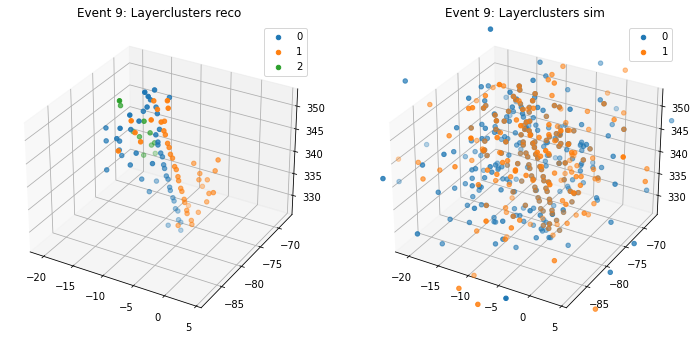

In [11]:
eid = 9
plot_event(eid)
print("SimTracksters:", simtracksters["stsSC_NTracksters"].array()[eid])
print("RecoTracksters:", tracksters["NTracksters"].array()[eid])

### Association scores
- 1 means completely unmatched
- 0 means a perfect 

The idea is to use argmax over the scores and then get the index of the best matched trackster

In [12]:
r2si = associations["tsCLUE3D_recoToSim_SC"].array()[eid]
r2s = associations["tsCLUE3D_recoToSim_SC_score"].array()[eid] # [tracksters] -> [simtracksters]

s2ri = associations["tsCLUE3D_simToReco_SC"].array()[eid]
s2r = associations["tsCLUE3D_simToReco_SC_score"].array()[eid] # [simtracksters] -> [tracksters]

print("Reco to sim:", r2s)
print("Reco to sim indexes:", r2si)

print("Sim to reco:", s2r)
print("Sim to reco indexes:", s2ri)

print("---")

for i_r, sim_idxs in enumerate(r2si):
    print(f"Reco trackster {i_r}:")
    for sim_idx in sim_idxs:
        print(f"\tSim Trackster {sim_idx}: {r2s[i_r][sim_idx]:.4f}")
        
print("---")
        
for i_s, reco_idxs in enumerate(s2ri):
    print(f"Sim trackster {i_s}:")
    for reco_idx in reco_idxs:
        print(f"\tReco Trackster {reco_idx}: {s2r[i_s][reco_idx]:.4f}")

Reco to sim: [[0.969, 0.000575], [0.933, 0.00195], [0.866, 0.0114]]
Reco to sim indexes: [[1, 0], [0, 1], [1, 0]]
Sim to reco: [[0.00421, 1, 1], [0.0111, 1, 1]]
Sim to reco indexes: [[0, 1, 2], [0, 65535, 1]]
---
Reco trackster 0:
	Sim Trackster 1: 0.0006
	Sim Trackster 0: 0.9692
Reco trackster 1:
	Sim Trackster 0: 0.9335
	Sim Trackster 1: 0.0020
Reco trackster 2:
	Sim Trackster 1: 0.0114
	Sim Trackster 0: 0.8660
---
Sim trackster 0:
	Reco Trackster 0: 0.0042
	Reco Trackster 1: 1.0000
	Reco Trackster 2: 0.9997
Sim trackster 1:
	Reco Trackster 0: 0.0111


ValueError: in NumpyArray attempting to get 65535, index out of range

(https://github.com/scikit-hep/awkward-1.0/blob/1.8.0/src/libawkward/array/NumpyArray.cpp#L1217)

### Plot metrics for the tracksters
- energy profile
- centrality?

### Training set categories:
- **perfect match**
    - same number of sim and reco tracksters
    - only one matched trackster below a threshold
- **mix-up** (skip for now)
    - same number of sim and reco tracksters
    - multiple matched tracksters below a threshold
    - should be split and reclustered?
- **overmerged** (skip for now)
    - more sim tracksters than reco tracksters
    - should be split
- **split**
    - more reco tracksters than sim tracksters
    - multiple well matched tracksters
    - should be joined

In [13]:
perfect_eids = []
split_eids = []
match_threshold = 0.2

for eid in range(len(tracksters["event"].array())):
    
    # get the number of traksters
    num_rec_t = tracksters["NTracksters"].array()[eid]
    num_sim_t = simtracksters["stsSC_NTracksters"].array()[eid]

    # get reco <-> sim maps
    r2s = np.array(associations["tsCLUE3D_recoToSim_SC_score"].array()[eid])
    s2r = np.array(associations["tsCLUE3D_simToReco_SC_score"].array()[eid])

    if num_rec_t == num_sim_t:  # matching number of tracksters
        perf_match = True  # assume perfect match

        for ti, reco_t in enumerate(r2s):
            sim_mask = (reco_t < match_threshold).astype(int)
            if np.sum(sim_mask) != 1:
                perf_match = False
                print(f"Event {eid}/{ti} reco to sim mismatch: {reco_t}")

        for ti, sim_t in enumerate(s2r):
            reco_mask = (sim_t < match_threshold).astype(int)
            if np.sum(reco_mask) != 1:
                perf_match = False
                print(f"Event {eid}/{ti} sim to reco mismatch: {sim_t}")
                
        if perf_match:
            perfect_eids.append(eid)

    elif num_rec_t > num_sim_t: # split
        split_eids.append(eid)
    else:                       # overmerged
        print(f"Event {eid} is overmerged ({num_sim_t} in {num_rec_t})")

Event 2 is overmerged (2 in 1)
Event 29 is overmerged (2 in 1)
Event 41/0 reco to sim mismatch: [0.26610556 0.24074322]
Event 41/0 sim to reco mismatch: [0.99107313 0.99982381]
Event 41/1 sim to reco mismatch: [0.98991692 1.        ]
Event 46 is overmerged (2 in 1)
Event 55/0 sim to reco mismatch: [0.99503708 1.        ]
Event 55/1 sim to reco mismatch: [1.         0.87861633]
Event 56/0 sim to reco mismatch: [0.95745611 0.99912971]
Event 56/1 sim to reco mismatch: [0.99998778 0.99636209]
Event 57 is overmerged (2 in 1)
Event 61 is overmerged (2 in 1)
Event 86/1 reco to sim mismatch: [0.39352414 0.25626943]
Event 86/0 sim to reco mismatch: [0.49005693 1.        ]
Event 86/1 sim to reco mismatch: [0.93406785 0.9965694 ]
Event 91/0 sim to reco mismatch: [0.75362718 1.        ]
Event 91/1 sim to reco mismatch: [0.67200488 0.99993402]
Event 92/0 reco to sim mismatch: [0.29394773 0.21791853]
Event 92/0 sim to reco mismatch: [0.99544811 0.99871063]
Event 92/1 sim to reco mismatch: [0.9945423

Perfect events: [1, 4, 6, 7, 8, 12, 14, 16, 18, 22, 23, 26, 27, 33, 34, 35, 36, 42, 44, 51, 53, 64, 65, 69, 70, 71, 72, 73, 77, 79, 80, 81, 82, 83, 87, 89, 93, 95, 96, 97, 98, 99]
Split events: [0, 3, 5, 9, 10, 11, 13, 15, 17, 19, 20, 21, 24, 25, 28, 30, 31, 32, 37, 38, 39, 40, 43, 45, 47, 48, 49, 50, 52, 54, 58, 59, 60, 62, 63, 66, 67, 68, 74, 75, 76, 78, 84, 85, 88, 90, 94]


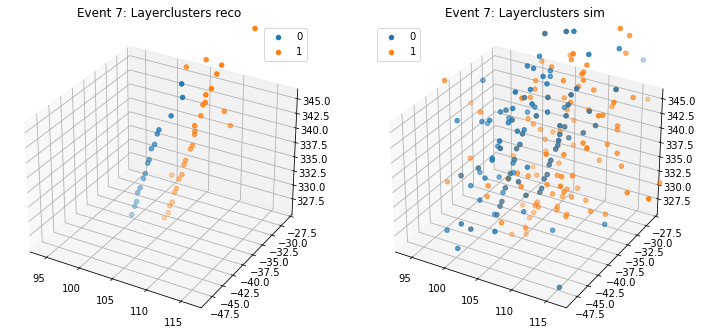

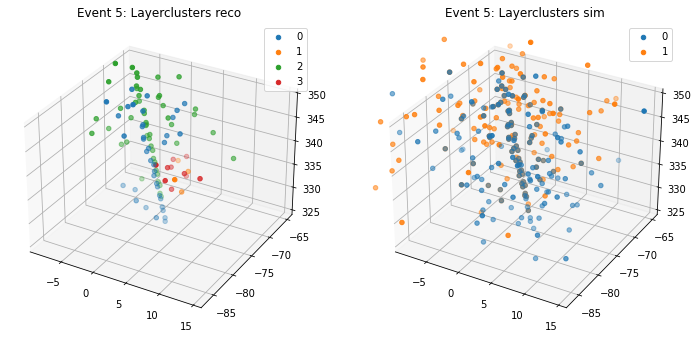

In [141]:
print("Perfect events:", perfect_eids)
print("Split events:", split_eids)

plot_event(7)
plot_event(5)

### Incomplete trackster identification

Not all tracksters in a split event are incomplete.
- Try to identify the most mismatched tracksters
- We even know how many they should be

Incomplete trackster candidates
- take the ones with the largest uncertainity?
- take the ones with the smallest energy?
- RecoToSim - sharing multiple tracksters
- SimToReco - having multiple reco tracksters matched (take the one with the worse score?)

TODO:
- use fractions simToReco shared energy (fraction shared to total)
- tracksters with the smallest fraction are probably the ones we need to merge in
- get histograms of these fractions (to test the separation)

In [45]:

def uncertainty(score):
    return - 2. * (np.abs(score - 0.5) - 0.5)

def incomplete_uncertainty():
    """
    Compute incomplete tracksters based on uncertainty
    """
    incomplete_tracksters = []

    for split_eid in split_eids:
        # get reco to sim mapping
        r2s = np.array(associations["tsCLUE3D_recoToSim_SC_score"].array()[split_eid])
        r2su = [np.sum([uncertainty(sim_score) for sim_score in reco_t]) for reco_t in r2s]
        # XXX: integrate sim to reco scores into the uncertainty 

        # sort trackster indices by uncertainty
        sorted_u = sorted(range(len(r2su)), key=lambda x: r2su[x], reverse=True)
        num_rec_t = tracksters["NTracksters"].array()[split_eid]
        num_sim_t = simtracksters["stsSC_NTracksters"].array()[split_eid]

        # get the incomplete tracksters
        num_extra_t = num_rec_t - num_sim_t
        extra_t = sorted_u[:num_extra_t]
        incomplete_tracksters.append((split_eid, extra_t))

    return incomplete_tracksters

def incomplete_shared_energy():
    """
    Compute incomplete tracksters based on shared energy
    """
    incomplete_tracksters = []
    for split_eid in split_eids:
        # get the number of extra tracksters
        num_rec_t = tracksters["NTracksters"].array()[split_eid]
        num_sim_t = simtracksters["stsSC_NTracksters"].array()[split_eid]
        num_extra_t = num_rec_t - num_sim_t

        # get the raw energy of reco and sim tracksters
        raw_energy = np.array(tracksters["raw_energy"].array()[split_eid])
        st_raw_energy = np.array(simtracksters["stsSC_raw_energy"].array()[split_eid])

        # get the shared energy mapping
        # sim to reco, not reco to sim (naming is wring, use simToReco indices)
        s2ri = np.array(associations["tsCLUE3D_simToReco_SC"].array()[split_eid])
        s2r_SE = np.array(associations["tsCLUE3D_recoToSim_SC_sharedE"].array()[split_eid])

        # keep the highest fraction
        reco_fr = [0] * num_rec_t

        # for each trackster, get the simtrackster with the highest energy fraction
        for st_i, sim_t in enumerate(s2ri):
            st_e = st_raw_energy[st_i]
            print(f"Sim trackster {st_i} with energy {st_e:.4f}:")
            for reco_i in sim_t:
                st2rt_se = s2r_SE[st_i][reco_i]
                fraction = st2rt_se / st_e
                rt_e = raw_energy[reco_i]
                print(f"\tshared E with {reco_i} = {st2rt_se:.4f} / {rt_e:.4f}, fraction = {fraction:.4f}")
                if fraction > reco_fr[reco_i]:
                    reco_fr[reco_i] = fraction

        sorted_fr = sorted(range(len(reco_fr)), key=lambda x: reco_fr[x], reverse=True)
        extra_t = sorted_fr[:num_extra_t]

        incomplete_tracksters.append((split_eid, extra_t))
    return incomplete_tracksters

In [46]:
incomplete_tracksters_u = incomplete_uncertainty()
incomplete_tracksters_se = incomplete_shared_energy()

Sim trackster 0 with energy 104.6288:
	shared E with 0 = 91.8748 / 98.6577, fraction = 0.8781
	shared E with 1 = 0.2151 / 161.1848, fraction = 0.0021
	shared E with 2 = 0.2035 / 2.3585, fraction = 0.0019
Sim trackster 1 with energy 176.0968:
	shared E with 0 = 155.8509 / 98.6577, fraction = 0.8850
	shared E with 1 = 1.8132 / 161.1848, fraction = 0.0103


IndexError: index 65535 is out of bounds for axis 0 with size 3

Event 0: incomplete tracksters [2]
Event 3: incomplete tracksters [2]
Event 5: incomplete tracksters [1, 3]
Event 9: incomplete tracksters [2]
Event 10: incomplete tracksters [2]


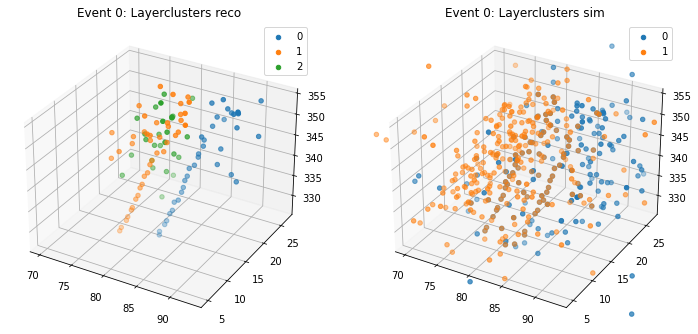

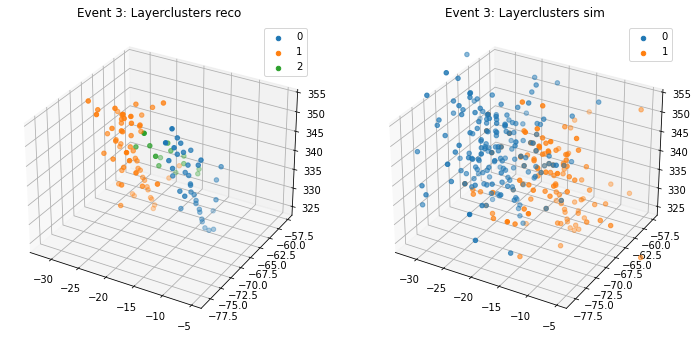

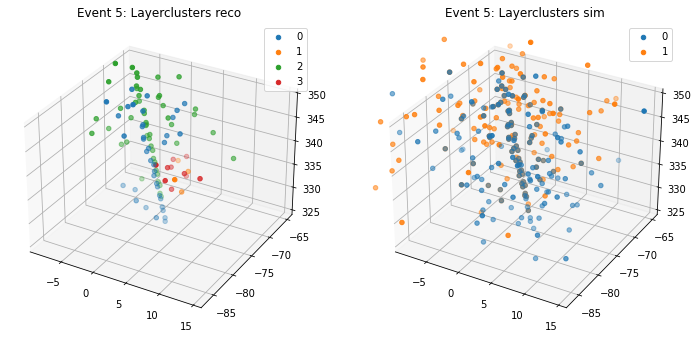

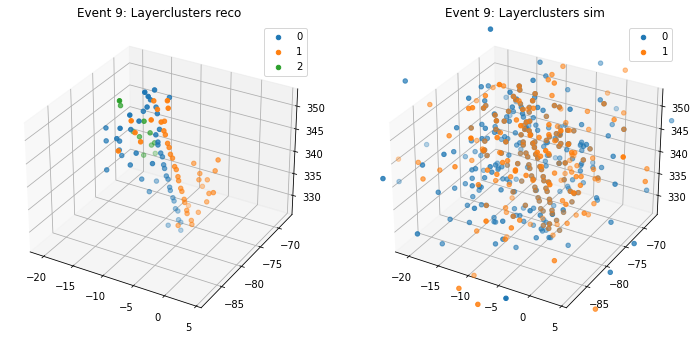

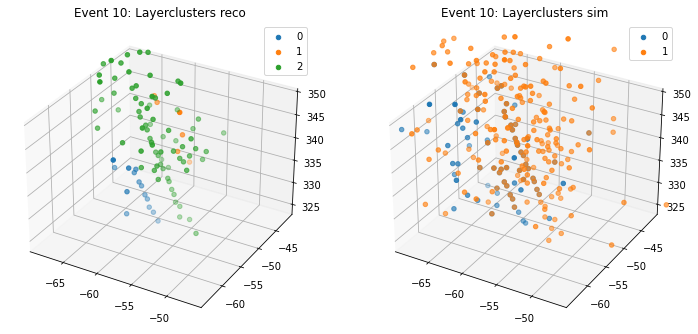

In [140]:
# check results
for eid, it in incomplete_tracksters_se[:5]:
    print(f"Event {eid}: incomplete tracksters {it}")
    plot_event(eid)

In [124]:
# Generate the dataset
# Trackster –> score (binary? some combinations from the associator?)